# Introduction
In this exercise, we're going to perform machine learning on our cleaned dataset from previous exercise. We're going to select three different models and compare the results. Two of the models will be tree based.
After that, we're going to plot the models performance to see if we have overfitting and why.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

In [2]:
# Read the dataset
file = "Telco-Customer-Churn-clean.csv"
df = pd.read_csv(file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

# Q0-Q1: Select three different models that you would like to test your dataset with. Explain why you selected this three models
The models we're going to select are:
- Decesion tree
- Randomforest
- k-nearest neighbours

These models are selected because they offer different advantages/disadvantages in performance, explainability and complexity. Thus, it can be  quite interesting to use these three in order to compare them. The differences will be explained below.

## KNN
The advantages of using KNN:
- Few parameters, which makes it less complex to implement it. It's also less complex to optimize the paramters.
- KNN is non-parametic, meaning that it doesn’t have any assumptions on the data distribution
- It is simple and easy to explain to people.

The disadvantages of using KNN:
- Slow with a larger dataset. If it is going to classify a new sample, it will have to read the whole dataset, hence, it becomes very slow as the dataset increases.
- KNN is more appropriate to use when you have a small number of inputs. If the number of variables grows, the KNN algorithm will have a hard time predicting the output of a new data point.

## Desicion tree
The advantages of using Decision Tree:
- Just like KNN, the Decision Tree classifier in non-parametic.
- Trees can be displayed graphically and can be easily interpreted by non-experts
- It can capture nonlinear relationships. They can be used to classify non-linearly separable data

The disadvantages of using Decision Tree:
- If the size of data is too big, then one single tree may grow a lot of nodes which might result in complexity and leads to overfitting.
- Trees can be non-robust. Eg. small change in the data can cause a large change in the final estimated tree

## Random forest
The advantages of using Random Forest:
- Random Forest algorithm is very stable. Even if a new data point is introduced in the dataset, the overall algorithm is not affected much since the new data may impact one tree, but it is very hard for it to impact all the trees.
- Random Forest is based on the bagging algorithm and uses Ensemble Learning technique.
- Just like decision trees, it can capture nonlinear relationships.

The disadvantages of using Random Forest:
- Random Forest require much more time to train as compared to other classifiers
- Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. 


# Q2: Based on the metric you have selected in last week’s assignment, make a comparative analysis between the performance of your models.
In order to perform the comparative analysis, we'll use GridSearchCV and print the best score, best params and execution time. After the predictions are done, some findings will be shown.

In [3]:
# Split the data set into train and test set
X = df.drop(['customerID','Churn'], axis = 1).values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 21)

# Set the classification models
knn = KNN()
dt = DecisionTreeClassifier()
ran_for = RandomForestClassifier()

classifiers = [knn, dt, ran_for]
names = ["K-Nearest Neigbours", "Decision Trees", "Random Forest"]
parameters = [{"n_neighbors": [3, 5, 15, 25],
              "weights": ['uniform', 'distance'],
              'leaf_size': [10, 20, 30, 40, 50]},
                {"max_depth": [4, 8, 12, 16],
              "min_samples_split": [20, 40, 80, 100, 120, 140, 160]},
             {"max_depth": [4, 8, 12, 16],
             "min_samples_split": [20, 40, 80, 100, 120, 140, 160]}
             ]

# Fit and predict each classifier using a for loop
for classifier, name, params in zip(classifiers, names, parameters):
    start = time.time()
    cv = GridSearchCV(classifier, params, cv=5, scoring = "recall", n_jobs = -1)
    cv.fit(X_train, y_train)
    
    best_model = cv.best_estimator_
    
    y_pred = best_model.predict(X_test)
    y_acc = accuracy_score(y_test, y_pred)
    y_recall = recall_score(y_test, y_pred)
    
    end = time.time()
    print("Best possible recall score for {}: {:.3f}".format(name, y_recall))
    print("Best possible accuracy score for {}: {:.3f}".format(name, y_acc))
    print(f"Best possible parameters for {name}: {cv.best_params_}")
    print("Execution time for {}: {:.5f}\n".format(name, end - start))

Best possible recall score for K-Nearest Neigbours: 0.518
Best possible accuracy score for K-Nearest Neigbours: 0.786
Best possible parameters for K-Nearest Neigbours: {'leaf_size': 10, 'n_neighbors': 15, 'weights': 'uniform'}
Execution time for K-Nearest Neigbours: 6.88421

Best possible recall score for Decision Trees: 0.526
Best possible accuracy score for Decision Trees: 0.784
Best possible parameters for Decision Trees: {'max_depth': 8, 'min_samples_split': 80}
Execution time for Decision Trees: 0.52580

Best possible recall score for Random Forest: 0.504
Best possible accuracy score for Random Forest: 0.801
Best possible parameters for Random Forest: {'max_depth': 12, 'min_samples_split': 20}
Execution time for Random Forest: 7.32147



## Findings
What we can see, is that the recall score for all models don't differ from each other that much when their paramters are optimized: around 50-53 percent. This is a bit dissapointing that nearly have of negative predicted values are falsely predicted. Luckily, the accuracy of the models are higher with 78%-80%. The overall accuracy can be improved, but is still better than the recall score.

There's a bigger difference in execution time. Decision Tree performs by far the fastest, with around 0.52 seconds. It also has the highest recall score: 52.6 %. This indicates that the Decision Tree performs the best on our data.

# Q3: Do you believe you have overfitting? Why?
Overfitting is when the the error/accuracy is much lower/higher than that of the test data. This makes it less adaptive to new data.

In order to find out if there's overfitting, a plot will be done of the accuracy scores for each models. On each point, the complexity increases. E.g. for K-nearest neighbors, the argument n_neighbors gets higher for each plot. This will show the scores when the complexity increases. The point where the parameters are chosen in previous chapter will also be plotted as an annotation.

In [4]:
# Create function that outputs recall scores list of a training and test set
def accuracy_scores(X_train, y_train, X_test, y_test, classifier, train_recalls, test_recalls):
    # Fit the model
    classifier.fit(X_train, y_train)
    
    # Predict and set recall scores for training set
    y_pred_train = classifier.predict(X_train)
    train_rec = accuracy_score(y_train, y_pred_train)
    train_recalls.append(train_rec)

    # Predict and set recall scores for test set
    y_pred_test = classifier.predict(X_test)
    test_rec = accuracy_score(y_test, y_pred_test)
    test_recalls.append(test_rec)
    
# Create function to plot results of recall score
def plot_accuracy_score(x, y_train, y_test, ax, xlabel, title,
                     xy_tit, xy_text):
    ax.plot(x, y_train, '-o', label = "Train")
    ax.plot(x, y_test, '-o', label = "Test")
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Accuracy score")
    ax.set_title(title)
    ax.annotate(xy_tit, xy = xy_text[0], xytext = (5, 0.9), 
            arrowprops = dict(arrowstyle = '->', color = 'red', lw = 3))
    ax.annotate(xy_tit, xy = xy_text[1], xytext = (5, 0.9), 
        arrowprops = dict(arrowstyle = '->', color = 'red', lw = 3))
    ax.legend()

In [5]:
train_recalls_knn, test_recalls_knn = list(), list()
train_recalls_dt, test_recall_dt = list(), list()
train_recalls_rf, test_recall_rf = list(), list()
values = [i for i in range(1, 31, 2)]
values_tree = [i for i in range(1, 16)]

for i in values:
    # Call recall_scores function to append KNN
    accuracy_scores(X_train, y_train, X_test, y_test, 
                  KNN(n_neighbors = i), train_recalls_knn, test_recalls_knn)
    
for j in values_tree:
    # Call recall_scores function to append DecisionTreeClassifier
    accuracy_scores(X_train, y_train, X_test, y_test, 
                  DecisionTreeClassifier(max_depth = j), train_recalls_dt, test_recall_dt)
    
    # Call recall_scores function to append RandomForest 
    accuracy_scores(X_train, y_train, X_test, y_test, 
                  RandomForestClassifier(max_depth = j), train_recalls_rf, test_recall_rf)

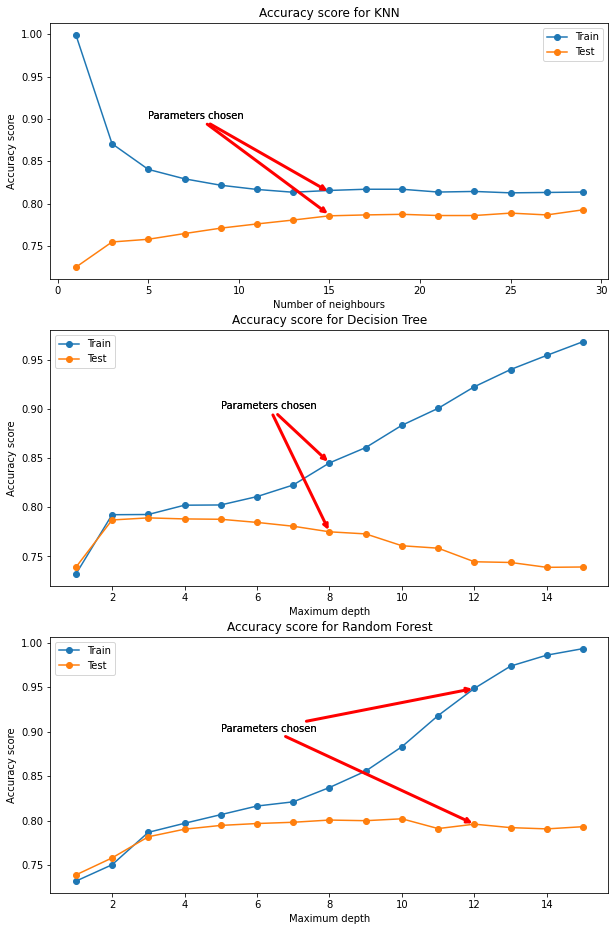

In [6]:
# Create the plot to show the test and train recall scores
fig, ax = plt.subplots(nrows = 3, figsize = (10, 16))

# Set parameters
x1 = values
x2 = values_tree
xlabels = ["Number of neighbours", "Maximum depth"]
titles = ["Accuracy score for KNN", "Accuracy score for Decision Tree", "Accuracy score for Random Forest"]

# Annotations
xy_txt = "Parameters chosen"
xytext_knn = ((15, train_recalls_knn[14]), (15, test_recalls_knn[13]))
xytext_dt = ((8, train_recalls_dt[7]), (8, test_recall_dt[7]))
xytext_rf = ((12, train_recalls_rf[11]), (12, test_recall_rf[11]))

# Call the funtionc three times to show all the recall scores
plot_accuracy_score(x1, train_recalls_knn, test_recalls_knn, 
                 ax[0], xlabels[0], titles[0], xy_txt, xytext_knn)

# Call the funtionc three times to show all the recall scores
plot_accuracy_score(x2, train_recalls_dt, test_recall_dt, 
                 ax[1], xlabels[1], titles[1], xy_txt, xytext_dt)

# Call the funtionc three times to show all the recall scores
plot_accuracy_score(x2, train_recalls_rf, test_recall_rf, 
                 ax[2], xlabels[1], titles[2], xy_txt, xytext_rf)

plt.show()

## Findings
Based on the plots, the following findings will be drawn for each model.

### KNN
For KNN, we can see that the accuracy score for the training data is pretty close compared to the test data on the parameters that are chosen. Here, the n_neighbors argument was 15. This means that for each data point, it checks the closest 15 neighbors. Because the scores of the training and the test set aren't too different from each other, this is not a case of overfitting.

### Decision tree
Based on the plot, the difference between training and test accuracy score for the decision tree model is a bit larger than the KNN. And that the overall difference is going up after it got more fine-tuned after a maximum depth of 5. Based on this, we can conclude that the Decision Tree model has been overfit. 

### Random forest
The maximum depth chosen for random forest chosen is 12. On the graph, there's quite a big difference between accuracy scores for the training and test set. That's why this is a case of overfitting.

### How to prevent/reduce this
For this exercise, we used gridsearch in order to fine tune the model. However, it has led to some overfitting of the models. A suggestion to avoid/reduct this, is to create a less complex range of parameters to perform the GridSearchCV on. This could also lead to faster execution.